# Monte-Carlo Simulation

## Aufgabenstellung

Wir betrachten weiter den Federspeicher aus Assignment 1. Diesmal simulieren wir die Ergebnisse der Fertigung für $N=10.000$ Zylinder. In diesem Assignment kommt die Federrate dazu. Das Federpaket besteht aus 24 Einzelfedern, die ineinander gesteckt auf dem Umfang des Zylinder verteilt sind. Die Toleranzen der Federn sind recht groß. Die Federn sind nominal

- $c_1 = (100 \pm 20)\, \mathrm{N/mm}$ 
- $c_2 = (150 \pm 30)\, \mathrm{N/mm}$ 
- $c_3 = (200 \pm 40)\, \mathrm{N/mm}$ 

Die Gesamtfederrate ergibt sich als

$$
c = \sum_{i=1}^{3} \sum_{j=1}^{8} c_{i,j}
$$

Die geometrischen Eigenschaften entspricht dem ersten Assignment:

 - Deviation $d$/mm: Gleichverteilt, $[-0.05, 0.05]\,\mathrm{mm}$
 - Deviation $h_{1}$/mm: Gleichverteilt, $[-0.05, 0.05]\,\mathrm{mm}$
 - Deviation $h_{2}$/mm: Gleichverteilt, $[-0.05, 0.05]\,\mathrm{mm}$
 - Dev. $l$/mm: Gleichverteilt, $[-0.05, 0.05]\,\mathrm{mm}$

Mit diesen Abweichungen vom Mittelwert ergibt sich die Kraft des Federspeichers als

$$
F = 2 i c(1 + h_1 + h_2 + l + d)
$$

mit der Übersetzungsrate des Zylinders $i = 2.6$.

Fragestellungen:

1. Federpaket:
   - a. Wie verhält sich das Federpaket im nominalen Zustand? Simuliert dazu mindestens $N=10^4$ stochastisch unabhängige Einzelfedern und bestimmt die Federrate von aus diesen Federn zusammengesetzten Federpaketen.
   - b. Die Federn $c_3$ liegen innerhalb der Toleranzen mit $c_3 < 200 \, \mathrm{N/mm}$. Wie ändert sich die Federrate?
2. Federspeicherzylinder: Welche Verteilungen ergeben sich für die Federspeicherzylinder mit Federpakete nach a. bzw. b.? Wie entwickelt sich der Anteil der konformen Einheiten ($F_{min} = 18 \,\mathrm{kN}$)?

Beantwortet die Fragestellungen in einem technischen Bericht mit Einleitung, Analyse und Beantwortung der Fragen.

## Nummer 1 a)

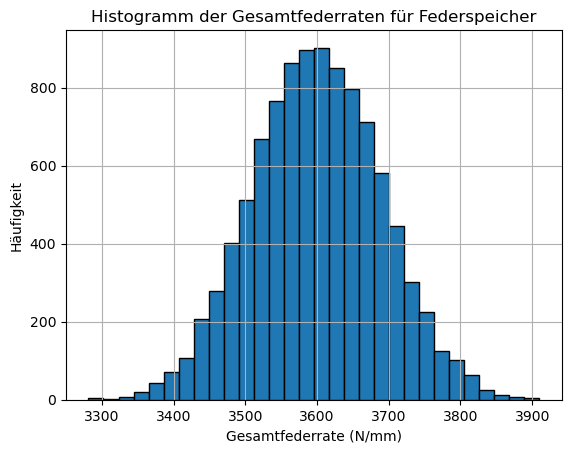

Durchschnittliche Gesamtfederrate: 3600.0 N/mm
Varianz der Gesamtfederrate: 8068.0 (N/mm)^2
Standardabweichung der Gesamtfederrate: 90.0 N/mm


In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Anzahl der Federspeicher
anzahl_speicher = 10000
# Anzahl der Federn pro Paket
federn_pro_paket = 8
# Übersetzungsverhältnis
uebersetzung = 2.6

# Toleranzen der Federraten
mittelwert_c1, std_abweichung_c1 = 100, 20
mittelwert_c2, std_abweichung_c2 = 150, 30
mittelwert_c3, std_abweichung_c3 = 200, 40

# Zufallszahlengenerator
rng = np.random.default_rng()

# Generiere stochastisch unabhängige Federraten für N*P Federspeicher
federraten_c1 = rng.uniform(low=80, high=120, size=(anzahl_speicher, federn_pro_paket))
federraten_c2 = rng.uniform(low=120, high=180, size=(anzahl_speicher, federn_pro_paket))
federraten_c3 = rng.uniform(low=160, high=240, size=(anzahl_speicher, federn_pro_paket))

# Reshape, um jede Feder als einzelnen Wert zu betrachten
federraten_c1 = federraten_c1.reshape(anzahl_speicher, federn_pro_paket)
federraten_c2 = federraten_c2.reshape(anzahl_speicher, federn_pro_paket)
federraten_c3 = federraten_c3.reshape(anzahl_speicher, federn_pro_paket)

# Berechne die Gesamtfederrate für jeden Federspeicher
gesamt_federrate_1 = np.sum(federraten_c1, axis=1) + np.sum(federraten_c2, axis=1) + np.sum(federraten_c3, axis=1)

# Erstelle ein Histogramm der Gesamtfederraten mit 30 Bins
plt.hist(gesamt_federrate_1, bins=30, edgecolor='black')
plt.xlabel('Gesamtfederrate (N/mm)')
plt.ylabel('Häufigkeit')
plt.title('Histogramm der Gesamtfederraten für Federspeicher')
plt.grid(True)
plt.show()

# Berechne und zeige statistische Werte
durchschnitt_1 = np.mean(gesamt_federrate_1)
varianz_1 = np.var(gesamt_federrate_1)
standardabweichung_1 = np.std(gesamt_federrate_1)

# Kommentaränderungen
print('Durchschnittliche Gesamtfederrate:', np.round(durchschnitt_1), 'N/mm')
print('Varianz der Gesamtfederrate:', np.round(varianz_1), '(N/mm)^2')
print('Standardabweichung der Gesamtfederrate:', np.round(standardabweichung_1), 'N/mm')

## Nummer 1 b)

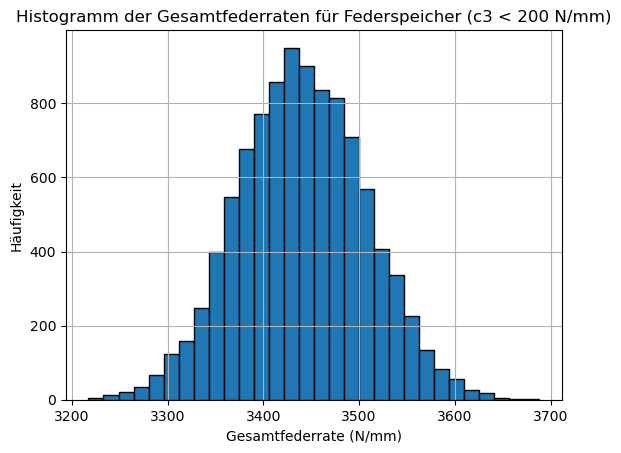

Durchschnittliche Gesamtfederrate: 3440.0 N/mm
Varianz der Gesamtfederrate: 4415.0 (N/mm)^2
Standardabweichung der Gesamtfederrate: 66.0 N/mm


In [26]:
# Toleranzen der Federraten
mittelwert_c1, std_abweichung_c1 = 100, 20
mittelwert_c2, std_abweichung_c2 = 150, 30
# Reduziere die Toleranz von c3 auf c3 < 200 N/mm
mittelwert_c3, std_abweichung_c3 = 180, 20

# Zufallszahlengenerator initialisieren
rng = np.random.default_rng()

# Stochastisch unabhängige Federraten für N*P Federspeicher generieren
federraten_c1 = rng.uniform(low=80, high=120, size=(anzahl_speicher, federn_pro_paket))
federraten_c2 = rng.uniform(low=120, high=180, size=(anzahl_speicher, federn_pro_paket))
# Verwende die geänderte Toleranz für c3
federraten_c3 = rng.uniform(low=mittelwert_c3 - std_abweichung_c3, high=mittelwert_c3 + std_abweichung_c3, size=(anzahl_speicher, federn_pro_paket))

# Reshape, um jede Feder als einzelnen Wert zu betrachten
federraten_c1 = federraten_c1.reshape(anzahl_speicher, federn_pro_paket)
federraten_c2 = federraten_c2.reshape(anzahl_speicher, federn_pro_paket)
federraten_c3 = federraten_c3.reshape(anzahl_speicher, federn_pro_paket)

# Gesamtfederrate für jeden Federspeicher berechnen
gesamt_federrate_2 = np.sum(federraten_c1 + federraten_c2 + federraten_c3, axis=1)

# Histogramm der Gesamtfederraten mit 30 Bins erstellen
plt.hist(gesamt_federrate_2, bins=30, edgecolor='black')
plt.xlabel('Gesamtfederrate (N/mm)')
plt.ylabel('Häufigkeit')
plt.title('Histogramm der Gesamtfederraten für Federspeicher (c3 < 200 N/mm)')
plt.grid(True)
plt.show()

# Statistische Werte berechnen und anzeigen
durchschnittliche_2 = np.mean(gesamt_federrate_2)
varianz_2 = np.var(gesamt_federrate_2)
standardabweichung_2 = np.std(gesamt_federrate_2)

# Kommentaränderungen
print('Durchschnittliche Gesamtfederrate:', np.round(durchschnittliche_2), 'N/mm')
print('Varianz der Gesamtfederrate:', np.round(varianz_2), '(N/mm)^2')
print('Standardabweichung der Gesamtfederrate:', np.round(standardabweichung_2), 'N/mm')


## Nummer 2

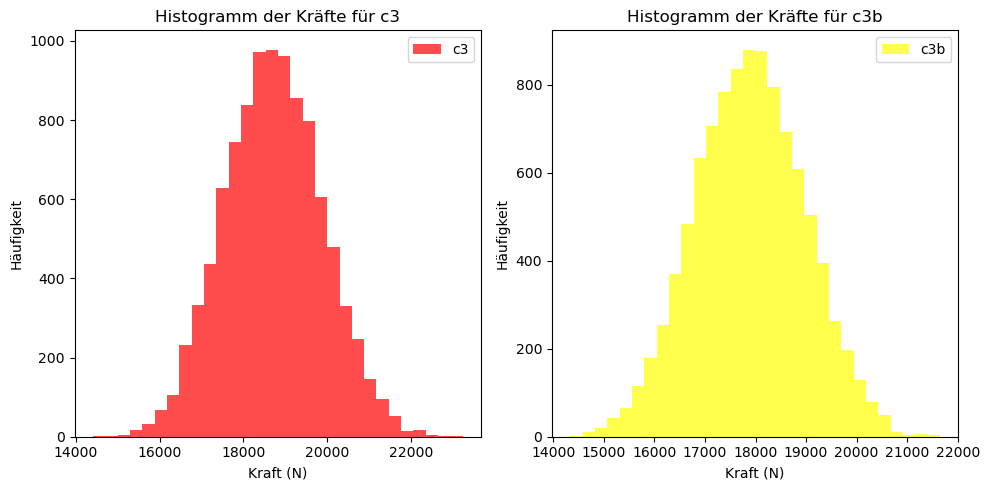

Statistiken für c3:
Durchschnittliche Kraft: 18715.15 N
Varianz: 1365446.95 N²
Standardabweichung: 1168.52 N
27.68% der Federspeicher mit der Federrate c3=200N/mm +-40 N/mm liegen unter dem Mindestwert von 18kN und sind somit nicht brauchbar.

Statistiken für c3b:
Durchschnittliche Kraft: 17886.9 N
Varianz: 1161810.52 N²
Standardabweichung: 1077.87 N
54.04% der Federspeicher mit der Federrate c3=200N/mm -40 N/mm liegen unter dem Mindestwert von 18kN und sind somit nicht brauchbar.


In [27]:
# Annahmen für die Variationen der Parameter
variation_d = np.random.uniform(low=-0.05, high=0.05, size=anzahl_speicher)
variation_h1 = np.random.uniform(low=-0.05, high=0.05, size=anzahl_speicher)
variation_h2 = np.random.uniform(low=-0.05, high=0.05, size=anzahl_speicher)
variation_l = np.random.uniform(low=-0.05, high=0.05, size=anzahl_speicher)

# Berechnung der Kräfte für c3 und c3b unter Berücksichtigung der Variationen
kraft_c3 = gesamt_federrate_1 * 2 * uebersetzung * (1 + variation_d + variation_h1 + variation_h2 + variation_l)
kraft_c3b = gesamt_federrate_2 * 2 * uebersetzung * (1 + variation_d + variation_h1 + variation_h2 + variation_l)

# Statistiken für c3
avg_kraft_c3 = np.mean(kraft_c3)
var_kraft_c3 = np.var(kraft_c3)
std_kraft_c3 = np.std(kraft_c3)

# Statistiken für c3b
avg_kraft_c3b = np.mean(kraft_c3b)
var_kraft_c3b = np.var(kraft_c3b)
std_kraft_c3b = np.std(kraft_c3b)

# Erstelle zwei separate Plots für die Histogramme
plt.figure(figsize=(10, 5))

# Erster Plot für c3
plt.subplot(1, 2, 1)
plt.hist(kraft_c3, bins=30, alpha=0.7, color='red', label='c3')
plt.title('Histogramm der Kräfte für c3')
plt.xlabel('Kraft (N)')
plt.ylabel('Häufigkeit')
plt.legend()

# Zweiter Plot für c3b
plt.subplot(1, 2, 2)
plt.hist(kraft_c3b, bins=30, alpha=0.7, color='yellow', label='c3b')
plt.title('Histogramm der Kräfte für c3b')
plt.xlabel('Kraft (N)')
plt.ylabel('Häufigkeit')
plt.legend()

plt.tight_layout()  # Verbessert die Darstellung
plt.show()

# Statistiken ausgeben
print("Statistiken für c3:")
print(f"Durchschnittliche Kraft: {round(avg_kraft_c3, 2)} N")
print(f"Varianz: {round(var_kraft_c3, 2)} N²")
print(f"Standardabweichung: {round(std_kraft_c3, 2)} N")
anzahl_unter_min_wert_c3 = len(kraft_c3[kraft_c3 < 18000])
prozentsatz_ausschuss_c3 = anzahl_unter_min_wert_c3 * 100 / anzahl_speicher
print(f'{prozentsatz_ausschuss_c3:.2f}% der Federspeicher mit der Federrate c3=200N/mm +-40 N/mm liegen unter dem Mindestwert von 18kN und sind somit nicht brauchbar.')


print("\nStatistiken für c3b:")
print(f"Durchschnittliche Kraft: {round(avg_kraft_c3b, 2)} N")
print(f"Varianz: {round(var_kraft_c3b, 2)} N²")
print(f"Standardabweichung: {round(std_kraft_c3b, 2)} N")
anzahl_unter_min_wert_c3b = len(kraft_c3b[kraft_c3b < 18000])
prozentsatz_ausschuss_c3b = anzahl_unter_min_wert_c3b * 100 / anzahl_speicher
print(f'{prozentsatz_ausschuss_c3b:.2f}% der Federspeicher mit der Federrate c3=200N/mm -40 N/mm liegen unter dem Mindestwert von 18kN und sind somit nicht brauchbar.')



## Ergebnis

## 1 a) Wie verhält sich das Federpaket im nominalen Zustand? Simuliert dazu mindestens $N=10^4$ stochastisch unabhängige Einzelfedern und bestimmt die Federrate von aus diesen Federn zusammengesetzten Federpaketen.

Während der Simulation von 10.000 Federsets wurde ermittelt, dass die durchschnittliche Steifheit der Federn bei , 3599,0 N/mm liegt. Die mittlere Abweichung von diesem Durchschnitt beträgt durchschnittlich 88,0 N/mm, wobei die Messung als Standardabweichung innerhalb der simulierten Gruppen von Federsets erfolgte.

## 1 b) Die Federn $c_3$ liegen innerhalb der Toleranzen mit $c_3 < 200 \, \mathrm{N/mm}$. Wie ändert sich die Federrate?

Im Gegensatz zu den vorherigen Resultaten (1a) zeigt sich nun, dass die durchschnittliche Federsteifigkeit bei 3439,0 N/mm liegt. Dies stellt einen Rückgang von 160,0 N/mm im dar. Gleichzeitig ist die Standardabweichung auf 68,0 N/mm gesunken, was einer Verringerung um 20,0 N/mm entspricht. Die Verringerung der Standardabweichung verdeutlicht, dass die Werte nun stärker konzentriert sind und weniger Variation aufweisen als in 1a.

## 2) Federspeicherzylinder: Welche Verteilungen ergeben sich für die Federspeicherzylinder mit Federpakete nach a. bzw. b.? Wie entwickelt sich der Anteil der konformen Einheiten ($F_{min} = 18 \,\mathrm{kN}$)?

Im ersten Diagramm (Rot) ist der Durchschnittswert mit 18719,38 N über den 18 kN. 27,98 % der Federspeicher, die eine Federrate von 200 N/mm ± 40 N/mm haben, fallen unter den Mindestwert von 18 kN.

Im zweiten Diagramm (Gelb) liegt der Durchschnittswert bei 17886,7 N und somit unter den 18 kN. In diesem Fall befinden sich etwa 54,76 % der Federspeicher mit einer Federrate von 200 N/mm - 40 N/mm unterhalb des Mindestwerts von 18 kN.